# Submission 1: Classical Denoising
Implementation of the following:
1. Median Filter: Replace each pixel with the median value of its neighboring pixels

2. Mean Filter: Replace each pixel with the mean value of its neighboring pixels

3. Bilateral Filter: Preserves edges while reducing noise by taking into account both spatial and intensity differences.

4. Gaussian Blur: Apply a convolution operation using a gaussian kernel to smoothen the image

### Load Image

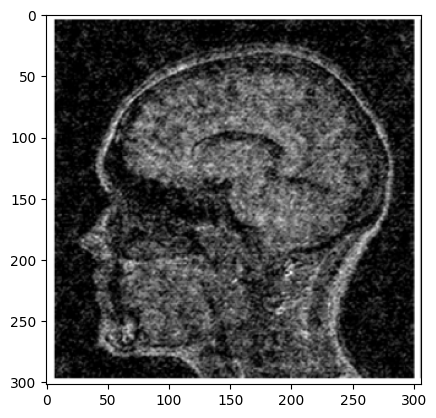

In [44]:
import cv2 as cv
import matplotlib.pyplot as pyplot
import numpy as np

img = cv.imread("images/noisy.png")
pyplot.imshow(img)

### Median Filter

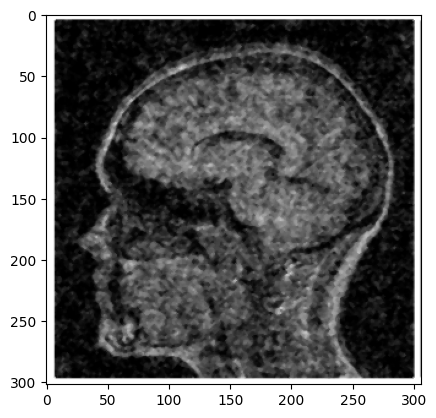

In [45]:
kernel_size = 3
median_filter = cv.medianBlur(img, kernel_size)

pyplot.imshow(median_filter)

### Mean Filter

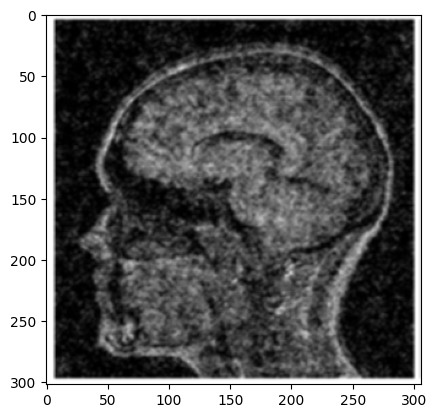

In [46]:
kernel_size = [3, 3]
mean_filter = cv.blur(img, kernel_size)

pyplot.imshow(mean_filter)

### Bilateral Filter

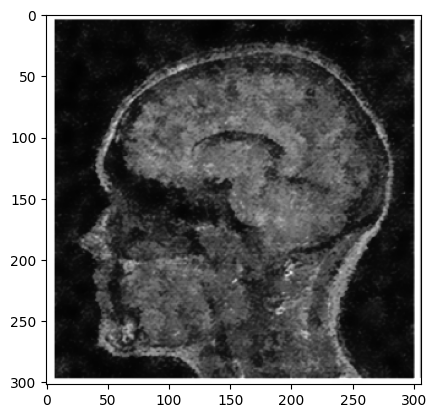

In [47]:
# hyperparameters jusko lord
size = 15
sigma_color = 75
sigma_space = 75
bilateral_filter = cv.bilateralFilter(img, size, sigma_color, sigma_space)

pyplot.imshow(bilateral_filter)

### Gaussian Blur

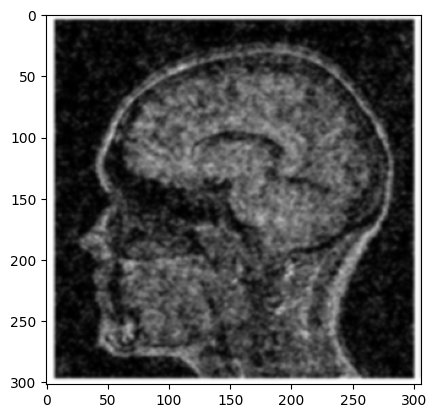

In [48]:
kernel_size = [5, 5]
std_dev = 0 #passing 0 will make function auto compute std dev
gauss_blur = cv.GaussianBlur(img,kernel_size,std_dev)
pyplot.imshow(gauss_blur)

## Evaluating denoising techniques

In [49]:
# https://www.tutorialspoint.com/how-to-compare-two-images-in-opencv-python
# lower is better

In [50]:
# convert to grayspace
img_clear = cv.imread("images/clear.png")
img_clear = cv.cvtColor(img_clear, cv.COLOR_BGR2GRAY)
img_median = cv.cvtColor(median_filter, cv.COLOR_BGR2GRAY)
img_mean = cv.cvtColor(mean_filter, cv.COLOR_BGR2GRAY)
img_bilat = cv.cvtColor(bilateral_filter, cv.COLOR_BGR2GRAY)
img_gauss = cv.cvtColor(gauss_blur, cv.COLOR_BGR2GRAY)


In [51]:
# mean squared error function
def mse(img_a, img_b):
    h, w = img_a.shape
    diff = cv.subtract(img_a, img_b)
    err = np.sum(diff**2)
    mse = err/(float(h*w))
    return mse

In [52]:
median_eval = mse(img_clear, img_median)
print('error: ', median_eval)

error:  26.173992555079426


In [53]:
mean_eval = mse(img_clear, img_mean)
print('error: ', mean_eval)

error:  27.833290048911397


In [54]:
bilat_eval = mse(img_clear, img_bilat)
print('error: ', bilat_eval)

error:  25.093905553391334


In [55]:
gauss_eval = mse(img_clear, img_gauss)
print('error: ', gauss_eval)

error:  27.64564125871099


**Which method had the best score? Why do you think this denoising method performed the best (explain in terms of its inherent steps / properties)?**

The bilateral filter performed best with a score of 25.093. We think this denoising method performed best since it considers the weights of the other pixels in the region of concern by averaging the smaller weight pixels causing noise, thus preserving the structural details during the denoising process instead of the blurring resulting from the other methods.